In [152]:
# Data 205 - Capstone in Data Science
# Jennifer Paraboschi     Fall 2020
# Inputs: data sets from dataMontgomery
# including Alcohol Beverage Licensing Violations

In [153]:
# Import packages. 
# Pull in API data set as json.
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly    
import plotly.express as px

In [154]:
violations_data = pd.read_json("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json")
violations_data.head()

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,AMY TEX MEX BAR & GRILL,"621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910",2020-10-31T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,NaN
1,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-10-31T00:00:00.000,5.10 DISPENSING OF LIQUOR,$1000 +ALERT,NaN
2,A.C. GRILL,"293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAND - 20878",2020-10-29T00:00:00.000,5.4 ALCOHOL AWARENESS CERTIFICATION,$100 +ALERT,NaN
3,ANTOJITOS RESTAURANT,"12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND - 20877",2020-10-25T00:00:00.000,6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS,$1000 +ALERT,NaN
4,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND - 20877",2020-10-25T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,NaN


In [155]:
print(violations_data)

                                        facilityname  \
0                            AMY TEX MEX BAR & GRILL   
1                                    EL CARACOL CAFE   
2                                         A.C. GRILL   
3                               ANTOJITOS RESTAURANT   
4                             CANCUN MEXICAN CUISINE   
5                             CANCUN MEXICAN CUISINE   
6                                HAKUNA MATATA GRILL   
7                               MOGOTILLO RESTAURANT   
8                                    EL CARACOL CAFE   
9                               MOGOTILLO RESTAURANT   
10                              MOGOTILLO RESTAURANT   
11                              MOGOTILLO RESTAURANT   
12                           GISELE'S CREOLE CUISINE   
13                            CASPIAN HOUSE OF KABOB   
14                            CASPIAN HOUSE OF KABOB   
15                               VILLAGE WEST LIQUOR   
16                           Q' VIVA COCINA & LO

In [156]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     950 non-null    object
 1   address          950 non-null    object
 2   violationdate    950 non-null    object
 3   violation        950 non-null    object
 4   disposition      948 non-null    object
 5   dispositiondate  941 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [157]:
# need to change the dates so they are in a useable format.
violations_data.violationdate = pd.to_datetime(violations_data.violationdate)
violations_data.dispositiondate = pd.to_datetime(violations_data.dispositiondate)

In [158]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     950 non-null    object        
 1   address          950 non-null    object        
 2   violationdate    950 non-null    datetime64[ns]
 3   violation        950 non-null    object        
 4   disposition      948 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 44.7+ KB


In [159]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate
count,950,950,950,950,948,941
unique,548,586,344,40,146,408
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11 00:00:00
freq,11,11,16,381,96,18
first,NaN,NaN,2012-06-19 00:00:00,NaN,NaN,2016-01-19 00:00:00
last,NaN,NaN,2020-10-31 00:00:00,NaN,NaN,2020-11-30 00:00:00


In [160]:
# There are a few missing values for disposition and disposition date (counts are fewer than total count in some columns).
# The most frequent violation is for sale to minor.

In [161]:
violations_data.isnull().sum()
# This gives the number of null values for each var.

facilityname       0
address            0
violationdate      0
violation          0
disposition        2
dispositiondate    9
dtype: int64

In [162]:
violations_data.nunique()
# This gives the number of unique values for each variable

facilityname       548
address            586
violationdate      344
violation           40
disposition        146
dispositiondate    408
dtype: int64

In [163]:
# Provide a list of the violations as an array.
violations_data.violation.unique()

array(['6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS',
       '5.10 DISPENSING OF LIQUOR', '5.4 ALCOHOL AWARENESS CERTIFICATION',
       '6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS',
       '6.8 ALCOHOLIC BEVERAGE CONTAINERS- REFILLING/TAMPERING',
       '5.5 RECORDS', '5.7 DISPLAY OF LICENSE', '6.9 STORAGE',
       '6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS',
       '5.2 CHANGES IN LICENSING INFORMATION', 'NO VIOLATION',
       '6.3 AGES OF EMPLOYEES', 'SALE TO MINOR',
       'LICENSE NOT PROPERLY DISPLAYED',
       'EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED',
       'ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES', 'STORAGE',
       'ACTS CONTRARY TO LAW', 'LICENSE COMPLIANCE CHECK',
       "LICENSEES' RESPONSIBILITY", 'DISORDERLY HOUSE',
       'NOISE/DISTURBANCE OF THE NEIGHBORHOOD',
       'DISPENSING LIQUOR BY BOTTLE FOR CONSUMPTION ONSITE',
       'REFILLING EMPTY/PARTIALLY EMPT

In [164]:
# count by category crosstab
violations_dist = violations_data.groupby("violation").size()

In [165]:
# Get counts of the number of violations at each violation type.
violations_data["violation"].value_counts().sort_values(ascending=False)

SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
RECORDS INVOICE VIOLATION                                                                           27
5.4 ALCOHOL AWARENESS CERTIFICATION                                                                 26
SALE/SERVICE TO INTOXICATED PATRON                                                                  16
STORAGE                                                                                             14
5.5 RECORDS                                                              

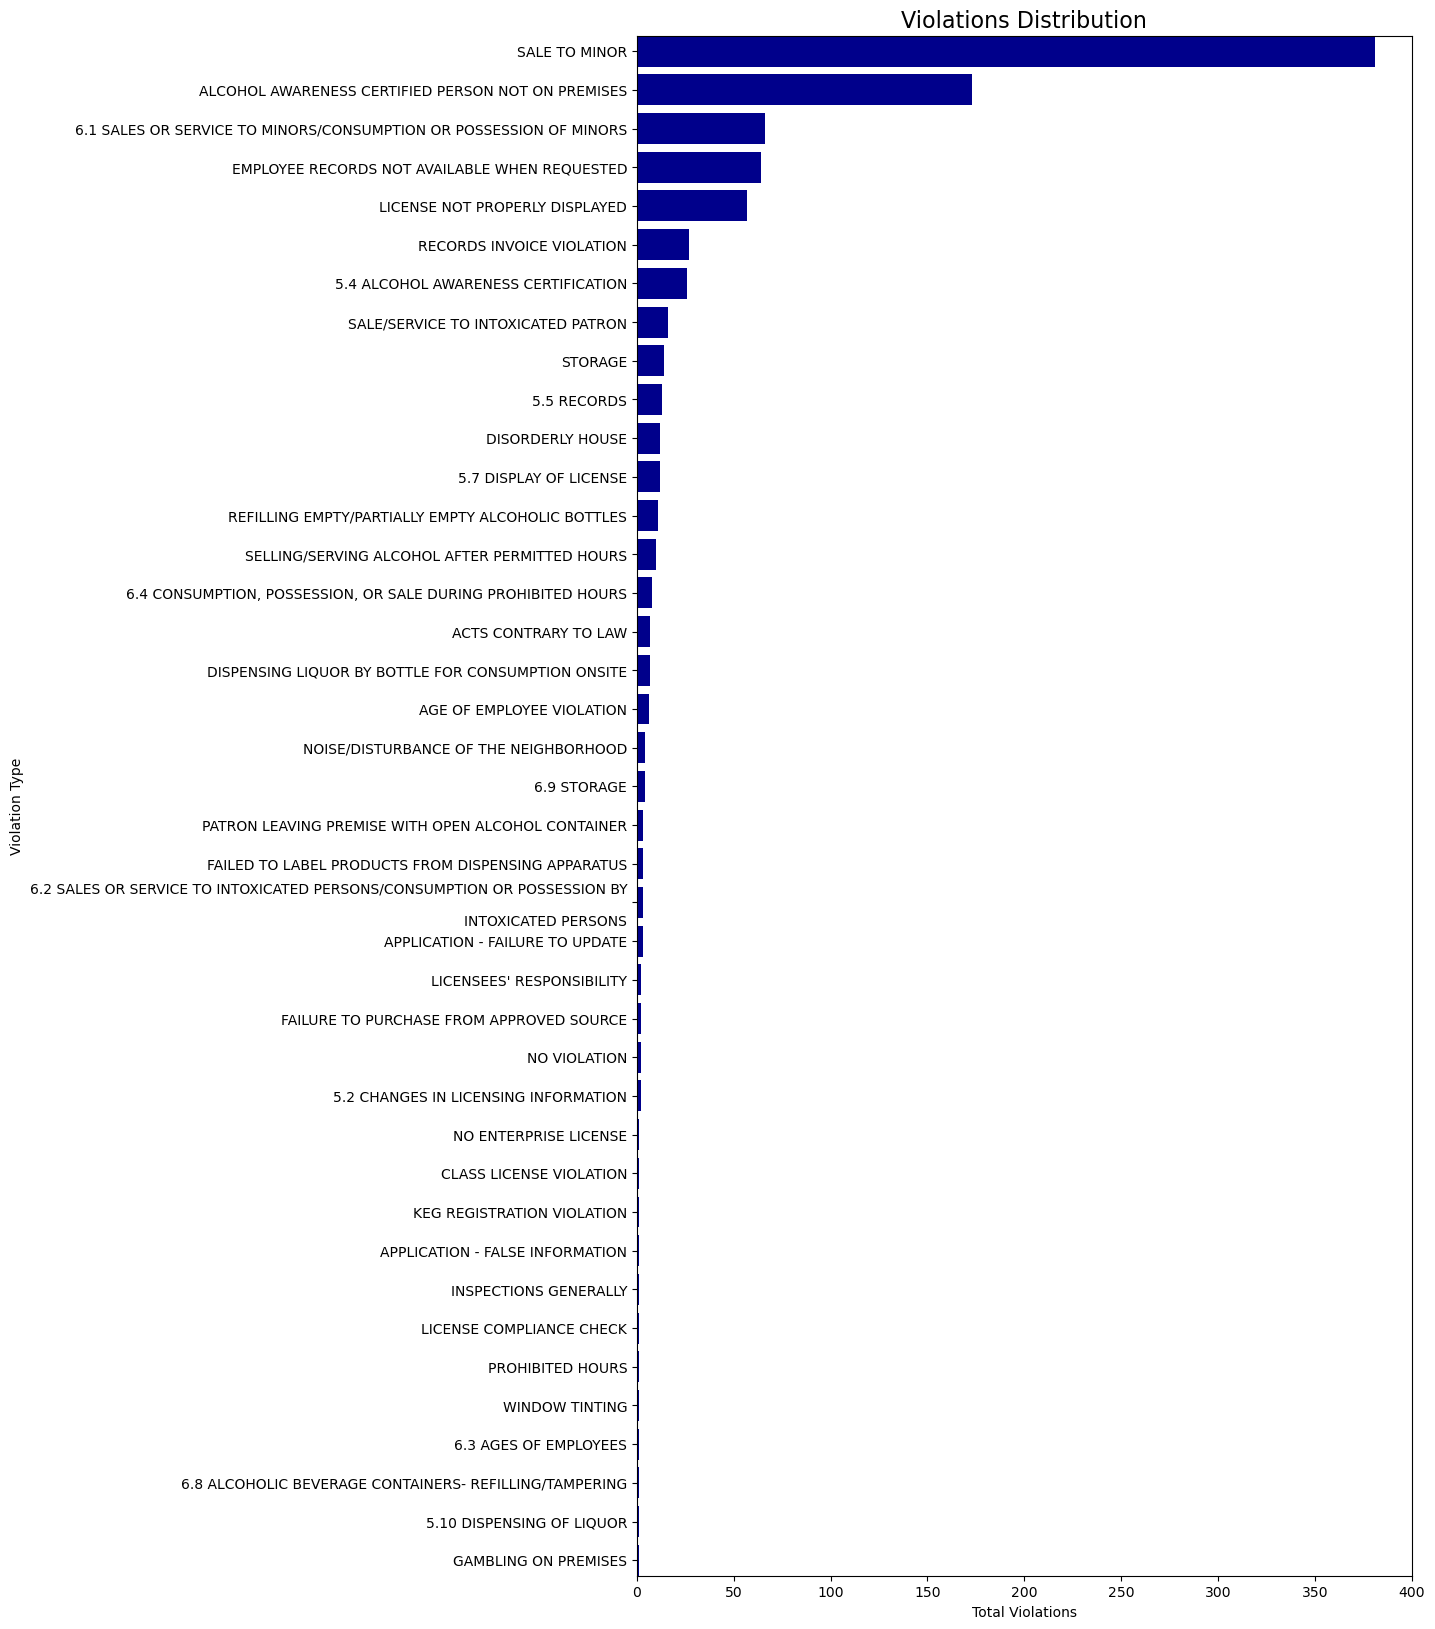

In [166]:
# From Professor
plt.rcdefaults()

violations_dist = violations_data["violation"].value_counts().sort_values()
x = violations_dist.index
y = violations_dist

fig = plt.figure(figsize=(10,20)) 
ax = fig.add_subplot(1,1,1)
ax.barh(x, y, color="darkblue", linewidth=3)
ax.set_title("Violations Distribution", fontsize=16)
ax.set(ylabel="Violation Type", xlabel="Total Violations")
plt.margins(0.05, 0) # eliminates white space at top/bottom of chart
plt.savefig("ViolationsDist.png")
plt.show()


In [167]:
# Get counts of the number of violations at each facility name.
pd.set_option("display.max_rows", None)
violations_data["facilityname"].value_counts().sort_values(ascending=False)

GAITHERSBURG SUPERMARKET                           11
KALDI'S COFFEE                                      8
CAFE 20/20                                          8
MOGOTILLO RESTAURANT                                6
RESTAURANT POLLOS EL MESON                          6
PANDORA SEAFOOD HOUSE                               6
BAR LOUIE                                           6
GENTLEMAN JIM'S RESTAURANT                          6
AKIRA RAMEN IZAKAYA                                 6
TRAPEZARIA MEDITERRANEAN KUZINA                     5
TACO BAR                                            5
CANCUN MEXICAN CUISINE                              5
MIX BAR & GRILLE                                    5
CHIPOTLE MEXICAN GRILL                              5
SUPER CHICKEN                                       5
OUTBACK STEAKHOUSE                                  5
FUSION BAR & GRILL                                  5
OGEI'S CHICKEN & SUBS                               5
KAYPI RESTAURANT            

In [168]:
# Gaithersburg Supermarket has had the greatest number of violations. 
violations_data[violations_data.facilityname == "GAITHERSBURG SUPERMARKET"]

,facilityname,address,violationdate,violation,disposition,dispositiondate
161,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-09-24,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES,"2 WEEK SUSPENSION STARTING FROM JANUARY 20- FEBRUARY 9,2020",2019-09-24
198,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED,SETTLED;$500+ALERT,2019-08-01
199,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES,"2 WEEK SUSPENSION + ALERT (OCTOBER 9-OCTOBER 22, 2019)",2019-08-01
200,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,LICENSE NOT PROPERLY DISPLAYED,SETTLED;$100+ALERT,2019-08-01
227,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES,SETTLED;$500 + ALERT,2019-06-05
228,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED,$500+ALERT,2019-06-05
229,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,RECORDS INVOICE VIOLATION,SETTLED;$500+ ALERT,2019-09-09
698,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2017-04-03,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES,SETTLED; $500.00 + ALERT,2017-06-05
841,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2016-06-09,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES,SETTLED; $100.00 + ALERT,2016-08-19
842,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2016-06-09,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2016-08-16


In [ ]:
"""
Explore the penalties for the violations
"""

In [169]:
# The disposition var inconsistently contains a $ amount of the penalty with inconsistent formatting. 
# Use a regex to extract the penalty values.
violations_data["penalty"]=violations_data["disposition"].str.extract(r"((?<=\$)\d+)")
# This regex looks for the dollar sign (\$), then pulls all the digits (\d+) unlimited times (to the end).


In [170]:
violations_data["penalty"] # checking that the penalty amounts pulled in correctly.

0      1000
1      1000
2       100
3      1000
4      1000
5       200
6      1000
7       500
8       100
9      1600
10      100
11      500
12      400
13      100
14      500
15      500
16     1000
17     1000
18      500
19      100
20     2500
21      100
22     1000
23     1000
24     1000
25     1000
26        0
27     1000
28     2500
29      100
30     2500
31      500
32     1000
33     1000
34      100
35     1000
36      500
37      500
38     2500
39     1000
40     1000
41     1000
42     1000
43      500
44     1000
45     2500
46     1000
47     1000
48      500
49      500
50      100
51      100
52     1000
53     1000
54     1000
55      NaN
56      100
57     1000
58      500
59     2500
60      100
61      100
62      100
63     1000
64        0
65     1000
66     2500
67      500
68      100
69      100
70     1000
71     1000
72      500
73     1000
74     1000
75      500
76      100
77     1000
78      500
79      100
80      100
81      500
82      200
83  

In [171]:
violations_data["disposition"] # checking that the disposition column remained unchanged. 

0                                                             $1000 +ALERT
1                                                             $1000 +ALERT
2                                                              $100 +ALERT
3                                                             $1000 +ALERT
4                                                             $1000 +ALERT
5                                                              $200 +ALERT
6                                                             $1000 +ALERT
7                                                              $500 +ALERT
8                                                              $100 +ALERT
9                                                             $1600 +ALERT
10                                                             $100 +ALERT
11                                                             $500 +ALERT
12                                                             $400 +ALERT
13                       

In [ ]:
violations_data.isnull().sum() # provides a count of nulls for each var.

In [ ]:
# There are 51 records with no penalty value (nulls). 
# Some records did not result in a penalty being assessed.
# Need to provide a value (0) for the missing penalty amounts. 

In [ ]:
# Replace missing penalty values with 0.
violations_data["penalty"]=violations_data["penalty"].fillna(0)
# change the penalty type to an integer.
violations_data["penalty"]=violations_data["penalty"].astype(int)

In [ ]:
violations_data

In [ ]:
violations_data.info()

In [ ]:
# Get counts of the number of violations at each penalty amount.
violations_data["penalty"].value_counts().sort_values(ascending=False)

In [ ]:
# Most of the violations are for $1,000, $100, or $500. 
# Look at the max value or the facility that received the highest penalty amount.
violations_data[violations_data.penalty == violations_data.penalty.max()]

In [ ]:
# Silver Spring Hilton Hotel had the violation with the highest penalty. 
violations_data[violations_data.facilityname == "SILVER SPRING HILTON HOTEL"]

In [ ]:
# Explore distribution of the penalty amounts.
sns.distplot(violations_data["penalty"])  # or can add , bins = 20)]

In [ ]:
sns.catplot(x="penalty", kind="box", data=violations_data)

In [ ]:
sns.set()
_ = plt.hist(violations_data['penalty'])
_ = plt.xlabel('Amount')
_ = plt.ylabel('Count of Penalties at that Amount')
plt.show()

In [ ]:
violations_data.describe(include="all")

In [ ]:
# From above - counts of violations. These are the top 5 most frequent violations.
"""
SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
"""

# Pull top 5 most frequent violations into a subset
top_5_violations = violations_data[violations_data["violation"].isin(["SALE TO MINOR","ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES","6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS","EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED","LICENSE NOT PROPERLY DISPLAYED"])]


In [ ]:
# count by category crosstab
violations_dist_top5 = top_5_violations.groupby("violation").size()

In [ ]:
violations_dist_top5.plot(title="Distribution of Top Violations")


In [ ]:
# box plot categorical vars
box_violations=sns.boxplot(x="violation", y="penalty", data=violations_data)

In [ ]:
"""
Explore violations by zip code
"""

In [ ]:
# Copy the license violations zip codes into a separate var.
# Use a regular expression to pull out the zip codes.
violations_data["zip"]=violations_data["address"].str.extract(r"((?<=.)\d{5})")
# positive lookbehind, matches to digits exactly 5 long

violations_data["zip"]=violations_data["zip"].astype(int)
violations_data

In [ ]:
pd.set_option("display.max_colwidth", None)
addr=violations_data["address"].astype(str)
mask=addr.str.slice(-5,-4,1) == "-"

In [ ]:
# QA the slicing for zip.
violations_data.loc[mask, ["address","zip"]]

In [ ]:
violations_data["address"]

In [ ]:
violations_data

In [ ]:
# Now I have the zip codes of the Alcohol Beverage License Violations in the var "zip".
# Do frequency of violations by zip code.

In [ ]:
# Get counts of the number of violations by zip.
violations_data["zip"].value_counts().sort_values(ascending=False)

In [ ]:
# Now the zips are all 5-digits
# Bethesda (20814) and Rockville (20852) have the 2 highest frequencies. 

In [ ]:
violations_data.sort_values(by=["zip", "facilityname"])

sns.set()
_ = plt.hist(violations_data["zip"])
_ = plt.xlabel('Zip')
_ = plt.ylabel('Count of Violations')
plt.show()

In [ ]:
# This plots the top 10 most frequent zip codes. 
violations_data["zip"].value_counts()[:10].plot(kind="barh")


In [ ]:
# This has the potential to be interesting as I recognize some of the zip codes/areas. 
# I'll come back to this.

In [ ]:
### This works but there are too many zip codes to the display is too small to read.

# facet grid of violation amounts by zip code
#grid_viol_zip = sns.FacetGrid(violations_data, col="zip")
#grid_viol_zip.map(plt.hist, "penalty")

In [ ]:
"""
Explore the violations involving minors.
"""

In [ ]:
# Investigate frequencies by types of violations. 
# Group the sale to minor and 6.1 sales or service to minors. 

In [ ]:
# Groupby() function to pull the 2 violations together.
violations_minors = violations_data.groupby("violation").get_group("SALE TO MINOR" or "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")

In [ ]:
violations_minors

In [ ]:
type(violations_minors)

In [ ]:
violations_minors.describe(include="all")

In [ ]:
# This plots top 20 zip codes for the violations involving minors.
violations_minors["zip"].value_counts()[:20].plot(kind="barh")

In [ ]:
violations_minors["zip"].value_counts()[:10].plot(kind="barh")

In [ ]:
# Since violations involving minors are the most frequent violation overall...
# the plots of the full data set and the violations involving minors data set are very similar.

# Use a stacked bar chart. 
"""
import plotly.express as px

df = px.data.iris()

fig = px.bar(df, x="sepal_width", y="sepal_length", color="species",
			hover_data=['petal_width'], barmode = 'stack')

fig.show()


"""

In [ ]:
# From Professor: 
mask_minors = violations_data["violation"] == ("SALE TO MINOR" or "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")
violations_data["zip_minors"] = mask_minors

In [ ]:
# From Professor: 
violations_data[["violation", "zip", "zip_minors"]]

In [ ]:
# From Professor: 
zip_minor_violations = violations_data[["zip", "zip_minors"]].groupby(["zip"], as_index=False).sum()
zip_violations = violations_data[["zip", "violation"]].groupby(["zip"], as_index=False).count()
zip_minor_violations = zip_minor_violations.merge(zip_violations, on="zip")
zip_minor_violations

In [ ]:
zip_minor_violations.sort_values(ascending=False,by=["violation","zip"])

In [ ]:
# From Professor
plt.rcdefaults() #resets default chart style to not pick up previous chart style
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

bar_1 = range(len(zip_minor_violations["violation"]))
#zip_minor_violations.sort_values(by=["violation"])
ax.bar(bar_1, zip_minor_violations["violation"], label="Non Minor-Related Violations")
ax.bar(bar_1, zip_minor_violations["zip_minors"], bottom=zip_minor_violations["violation"], label="Minor-Related Violations")
plt.xticks(range(len(zip_minor_violations["zip"])), zip_minor_violations["zip"], rotation=90)
plt.legend(loc="upper right")
plt.title("Minor-Related Violations vs. Non Minor-Related Violations, by Zip Code")
plt.show()

In [ ]:
"""
Explore the High Schools
"""

In [ ]:
# I may try to overlay the high school locations with areas of highest crime and/or alcohol violations. 

In [ ]:
# Import the public high schools data set.
schools_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/772q-4wm8.json").json())
schools_data.head()

In [ ]:
# Drop the unnecessary columns (i.e., category, elementary/middle schools, phone and url).

In [ ]:
high_schools=schools_data[schools_data["category"] == "HIGH SCHOOLS"]
cols_drop=["category","phone","url"]
high_schools.drop(cols_drop, inplace=True, axis=1)
print(high_schools)

In [ ]:
# Map the high school locations.

In [ ]:
# Import the plotly express package

import plotly.express as px

fig_schools = px.scatter_geo(high_schools, 
                     lon="longitude", 
                     lat="latitude",
                     # choose the map chart's projection
                     projection="albers usa",
                     center=dict(lon=-77.14, lat=39.098),
                     # columns which is in bold in the pop up
                     hover_name = "school_name",
                     # format of the popup not to display these columns' data
                     hover_data = {"longitude": False, "latitude": False})
fig_schools.show()



In [ ]:
# I'm having trouble zooming in on this map. I decided to use a different map (below) that includes streets.

In [ ]:
# Follow instructions from here: https://plotly.com/python/mapbox-layers/#openstreetmap-tiles-no-token-needed
high_schools['latitude']=high_schools['latitude'].astype(float)
high_schools['longitude']=high_schools['longitude'].astype(float)

fig_schools_map = px.scatter_mapbox(high_schools, lat="latitude", lon="longitude", hover_name="school_name", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_schools_map.update_layout(mapbox_style="open-street-map")
fig_schools_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_schools_map.show()


In [ ]:
# I don't know what to do about the warnings (above)
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# While this map is OK, I can't decide what would make it better. 
# I was not able to make the points/circles bigger.
# I tried zooming in closer but then not all of the high schools show up.
# I tried to get the city to display as well as the HS name but was not able to get this to work.

# I'll try to map the violations and schools using Tableau.

In [ ]:
"""
Explore mapping the violations.
"""

In [ ]:
# I was able to clean the violation addresses in excel, upload to geocodio, then use that csv to map. 
# However, I want to be able to do this directly from the dataMontgomery API. 

# I tried again for the geolocation using geopy (below) following these instructions from towardsdatascience.com.
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
# I think there is a limit to how many times I can use the geolocater/site though. Not sure about that. 

In [ ]:
# Import the violations data set (I don't need to do this repeatedly but sometimes I am picking up here when I start again)
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

In [ ]:
# I had to pip install geopy on the cmd line to get this to work.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")
# Apply geolocator.geocode to the address column
violations_data["location"]=violations_data["address"].apply(geolocator.geocode)

In [ ]:
violations_data["point"]=violations_data["location"].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# Then pull the values into 3 diff vars (the 3rd one is altitude)

In [ ]:
violations_data[["latitude", "longitude", "altitude"]] = pd.DataFrame(violations_data["point"].to_list(), index=violations_data.index)

In [ ]:
# Map the locations of the violations
fig_violations_map = px.scatter_mapbox(violations_data, lat="latitude", lon="longitude", hover_name="facilityname", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_violations_map.update_layout(mapbox_style="open-street-map")
fig_violations_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_violations_map.show()


In [ ]:
"""
Explore CRASH data
"""

In [ ]:
# Pull in the Crash Incidents data 
# Trying to narrow down by alcohol activity because the dataset is so big.
selections = {"Driver Substance Abuse": "ALCOHOL PRESENT"}

crash_incidents_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/bhju-22kf.json",params=selections).json())
crash_incidents_data.head()

In [ ]:
crash_incidents_data.shape

In [ ]:
crash_incidents_data.describe(include="all")

In [ ]:
"""
Explore CRIME data
"""

In [ ]:
# Pull in the Crimes data 
# Trying to narrow by crimes against society and then crime2 for alcohol violations. 
# looking at the crimes data, there are only 8 alcohol-related crimes in the crimes data set.
# under Crime Name 2  Drunkenness,  Driving Under the Influence,  Liquor Law Violations
#select_crime = {"crimename1": "Crime Against Society"}

crime_data = pd.read_csv("crime.csv")
crime_data.head()

In [ ]:
crime_data.info()

In [ ]:
# Drop unnecessary columns
cols_to_drop=["Offence Code","CR Number","Dispatch Date / Time","Victims","Agency","Place","Sector","Beat","PRA","Address Number","Street Prefix","Street Name","Street Suffix","Street Type","End_Date_Time"]
crime_data.drop(cols_to_drop, inplace=True, axis=1)
crime_data.info()

In [ ]:
crime_data.describe(include="all")

In [ ]:
# There are 3,187 records with blank zip codes.
# There are another 200+ with incorrect zips (wrong number of digits and/or not in Montgomery County).
# Replace missing zip codes values with 0.
crime_data["Zip Code"]=crime_data["Zip Code"].fillna(0)
# change the zip code type to an integer.
crime_data["Zip Code"]=crime_data["Zip Code"].astype(int)

# This plots top 20 zip codes for the crimes.
crime_data["Zip Code"].value_counts()[:20].plot(kind="barh")

In [ ]:
"""
Explore Population data by zip code
"""

In [ ]:
# Pull population data from this site https://worldpopulationreview.com/zips/maryland
# This is the csv link:  blob:https://worldpopulationreview.com/00124d35-9d90-48ad-973f-a3eaddcbe13e 
# this is the json link:  blob:https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b
# I downloaded MD counties with populations by zip code so I can select Montgomery County. 
# The site says it reflects 2020 population data.
# blob:https://worldpopulationreview.com/087018d8-c25a-44cf-a6d9-cb479a108878
  #      blob:https://worldpopulationreview.com/507fea65-9f1a-483d-89a4-b640e1b3e9bb

In [ ]:
pop_zip_codes = pd.read_csv('PopulationZip.csv')
pop_zip_codes.head()

In [ ]:
pop_zip_codes.info()

In [ ]:
# groupby() to pull only Montgomery County zips.
pop_zip_mont = pop_zip_codes.groupby("county").get_group("Montgomery")
pop_zip_mont

In [ ]:
pop_zip_mont.info()

In [ ]:
# Get frequency of all crimes by zip code. (crimes data set has zip code column) 
# Need to calculate violations per population by zip code and crimes per population by zip code. 
# Compare alcohol violations by zip code with crimes by zip code. 

In [ ]:
# zip codes with high crime rates and zip codes with high ABS licenses and/or violations = correlation? 
# not just look at major crimes but also petty crimes. 

# Do this by taking ABS licenses (or violations) by population by zip code? 
# Then crimes by population by zip code? 